# Imports

In [1]:
import numpy as np
import optimizationFuncs as optim
import matplotlib.pyplot as plt

import cpso
from importlib import reload

chaoticPSO = cpso.CPSO_Optimizer

## Reload

In [2]:
cpso = reload(cpso)
chaoticPSO = cpso.CPSO_Optimizer

## Initialise Swarm

In [3]:
# Left boundary --> 5 dimensions, and xi=-100 is the left boundary each dimension (i=0,1,2,3,4)
llim = np.repeat (-20, 1)

# Right boundary --> 5 dimensions, and xi=100 is the right boundary for each dimension (i=0,1,2,3,4)
rlim = np.repeat (20, 1)

# Shape of the swarm --> 25 particles in 5-D space
shape = (25, 1)

# Returns the swarm --> Also internally creates a chaotic generator object
sw = chaoticPSO.getSwarm (shape, llim, rlim, "tent", "log", cache=True)
# sw = chaotcPSO.getSwarm (shape, llim, rlim)

## Supply Objective Function

In [4]:
# This call creates the PSO optimizer object
objective = optim.anuwu
truGrad = optim.funcGrads[objective]
mizer = sw(objective)

## Optimize

In [5]:
# Returns (optimum, approx-grad-function)
opt, approxGrad = mizer.optimize()
print ("\rOptimum is at f({}) = {}".format(opt[0], objective(opt.reshape(1,-1))[0]))
print ("Gradient at optimum = {}".format(approxGrad(opt)[0]))

Optimum is at f(-1.4959299174480936) = [-0.94125366]
Gradient at optimum = -0.0


## Check Grad

In [6]:
# Perturbing the optimum
dopt = opt + 1e-5*np.random.random_sample (opt.shape)
print ("approxGrad({}) = {}".format(dopt[0], approxGrad(dopt).flatten()[0]))

approxGrad(-1.4959207450862644) = -0.00016296728889111912


## Plot of 1-D approx gradient vs. true gradient

Objective function info --> 
 0.025x^2 + sin(x)
    f(-1.49593) = -0.941254
    x <- [-20, 20] 


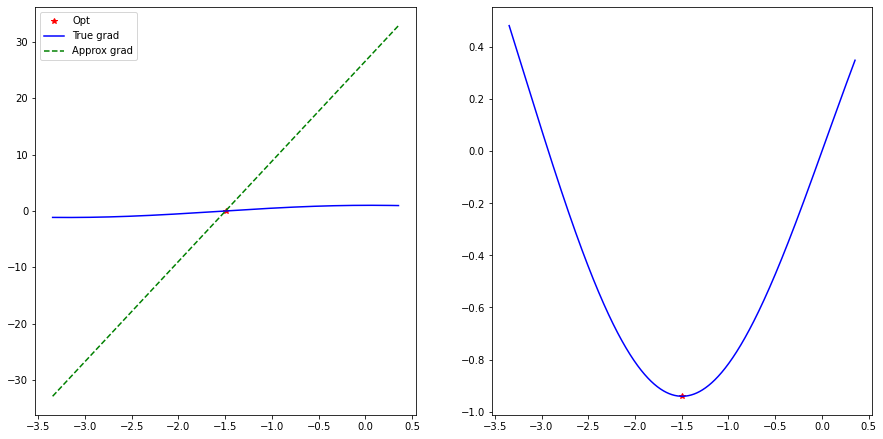

In [7]:
assert llim.shape[0] == 1

x = (lambda dx:np.linspace(opt-dx, opt+dx, 1000))(min(opt[0]-llim[0], rlim[0]-opt[0])/10)
print ("Objective function info --> \n{}".format(objective.__doc__))

fig, ax = plt.subplots(1,2, figsize=(15,7.5))
ax[0].plot(opt, truGrad(opt.reshape(1,-1)).flatten(), '*r', label="Opt")
ax[0].plot(x, truGrad(x), '-b', label="True grad")
ax[0].plot(x, -approxGrad(x), '--g', label="Approx grad")
ax[1].plot(opt, objective(opt.reshape(1,-1)).flatten(), '*r', label="Opt")
ax[1].plot(x, objective(x), 'b', label="Objective")
leg = ax[0].legend();

## Trajectory for 1-D

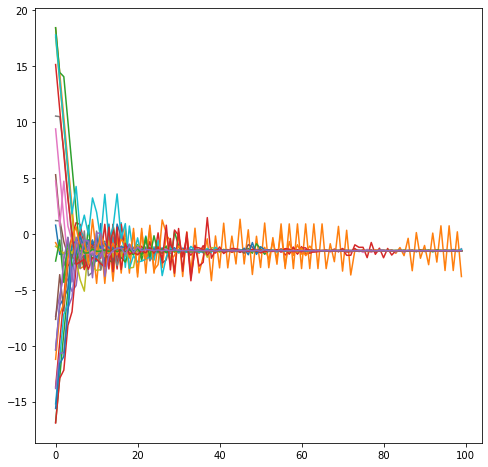

In [8]:
assert llim.shape[0] == 1

pcache = chaoticPSO.pcache[...,0]
plt.figure(figsize = (8, 8))
eps = 1e-4
i = 0
while i < shape[0] :
    (lambda l=0,r=chaoticPSO.pcache.shape[0] : plt.plot (np.arange(r-l), pcache[l:r,i]))(0,100)
    # plt.ylim(opt-eps,opt+eps)
    i += 1